# Punto 1



In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

In [2]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs


In [3]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

AttributeError: 'Line2D' object has no property 'LineWidth'

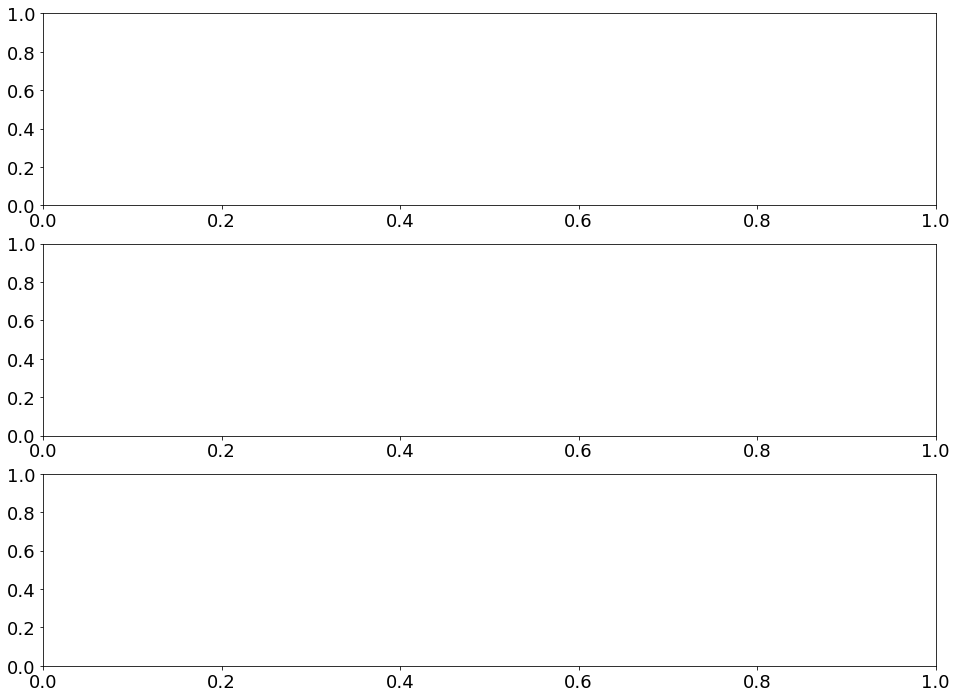

In [4]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',LineWidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

# Punto 2
$$ 
\begin{split}
&u''(x) +  u(x) =2*\cos(x) \quad \text{for $a< x< b$},\\
&u(a)=\alpha,\quad u(b)=\beta.
\end{split}
$$



Haga un programa para encontrar la solución del problema con
$$
a = 0, \quad b = \pi, \quad \alpha = 0, \quad \beta = 0.
$$
Use el hecho que la solución exacta del problema es $y=x\sin(x)$

# Punto 3
 \item Una placa rectangular de $6\times 5\ cm$ tiene calor que se genera 
uniformemente en todos los puntos con una rapidez de $q=1.5 \ cal/cm^3\cdot s$.
Representamos con  $x$ la distancia a lo largo del borde de la placa de una 
longitud de $6\ cm$ y con $y$ a lo largo del borde de la placa de $5 \ cm$.
Supóngase que la temperatura a lo largo del borde se mantiene en la siguiente 
temperatura:

$$
 \begin{cases}
 u(0,y)=y(5-y) \text{ para }0\leq y\leq 5,\\
 u(6,y)=0 \text{ para }0\leq y\leq 5,\\
 u(x,0)=x(6-x) \text{ para }0\leq x\leq 6,\\
 u(x,5)=0 \text{ para }0\leq x\leq 6.
 \end{cases}
$$
donde el origen se encuentra en una esquina de la placa con las coordenadas 
$(0,0)$ y los ejes se hallan a lo largo de los ejes positivos $x$ y $y$. La 
temperatura 
de estado  estable $u=u(x,y)$ satisface la ecuación de Poisson 
$$
 \frac{\partial^2u}{\partial x^2}(x,y)+\frac{\partial^2u}{\partial 
y^2}(x,y)=-\frac{q}{K}, \text{ con }0<x<6,\ 0<y<5,
$$
donde $K=1.04\ cal/cm\cdot deg\cdot s$, es la conductividad térmica.
*  Cree una estrategia numérica para aproximar esta ecuación, 
escriba en forma matricial.
* Encuentre el error local de truncamiento para su estrategia numérica.
* Escriba el método de forma matricial.
* Implemente su estrategia numérica y aproxime la solución. 
